# Leer datasets

In [32]:
import pandas as pd
import numpy as np

breast_cancer = pd.read_csv('../data/breast-cancer-wisconsin.csv')
# drop the 'id' column
breast_cancer = breast_cancer.drop(columns=['id', 'class'])
breast_cancer["bare_nucleoli"] = pd.to_numeric(breast_cancer["bare_nucleoli"], errors='coerce')
# drop rows with NaN values
breast_cancer = breast_cancer.dropna()
print(breast_cancer.shape)
print(breast_cancer.columns)
print(breast_cancer.dtypes)
breast_cancer.head()

(683, 9)
Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses'],
      dtype='object')
clump_thickness        int64
size_uniformity        int64
shape_uniformity       int64
marginal_adhesion      int64
epithelial_size        int64
bare_nucleoli        float64
bland_chromatin        int64
normal_nucleoli        int64
mitoses                int64
dtype: object


,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


# Realizamos los clusters

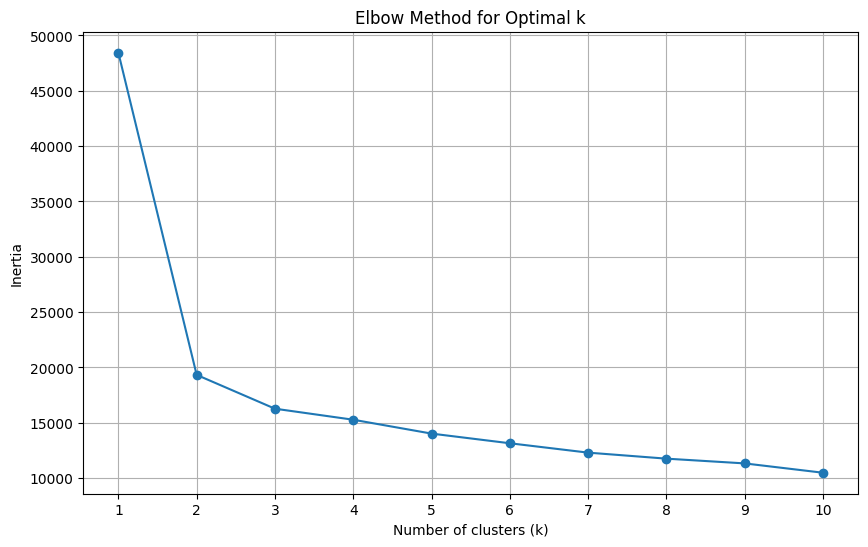

In [2]:
#hagamos metodo del codo para determinar el numero de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(data, max_k=10):
    inertia = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid()
    plt.show()
# Aplicar el método del codo
elbow_method(breast_cancer)

In [33]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(breast_cancer)
kmeans_labels = kmeans.labels_
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(breast_cancer)
dbscan_labels = dbscan.labels_
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(breast_cancer)
gmm_labels = gmm.predict(breast_cancer)

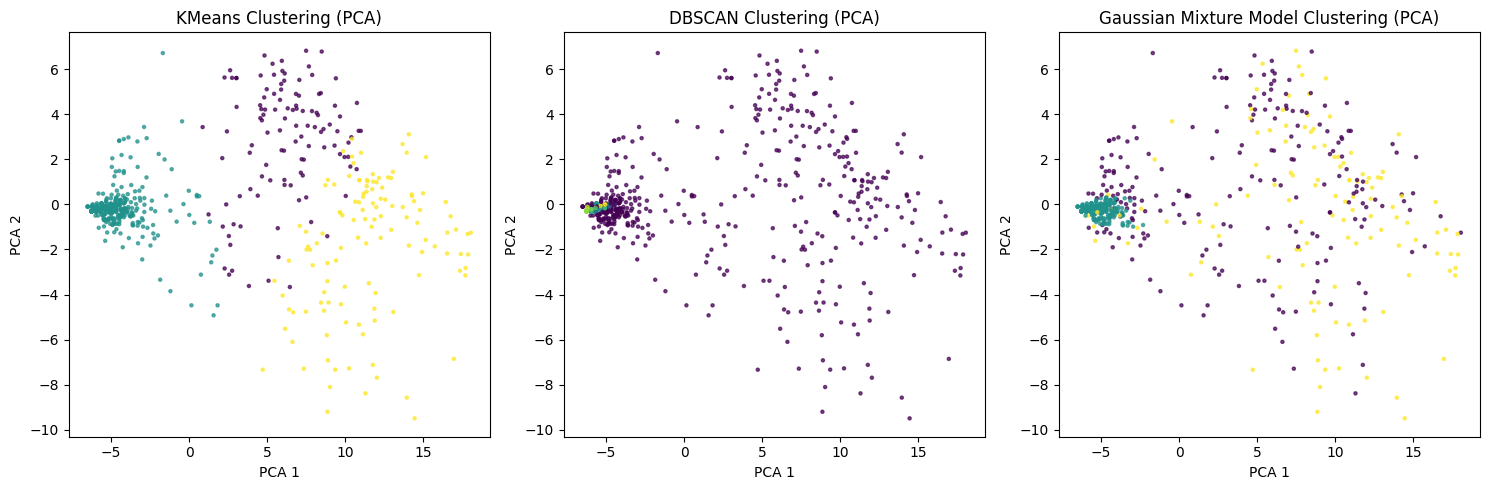

In [34]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2, random_state=42)
breast_cancer_pca = pca.fit_transform(breast_cancer)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(breast_cancer_pca[:, 0], breast_cancer_pca[:, 1], c=kmeans_labels, cmap='viridis', s=5, alpha=0.7)
plt.title('KMeans Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 2)
plt.scatter(breast_cancer_pca[:, 0], breast_cancer_pca[:, 1], c=dbscan_labels, cmap='viridis', s=5, alpha=0.7)
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 3)
plt.scatter(breast_cancer_pca[:, 0], breast_cancer_pca[:, 1], c=gmm_labels, cmap='viridis', s=5, alpha=0.7)
plt.title('Gaussian Mixture Model Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(breast_cancer, kmeans_labels)
dbscan_silhouette = silhouette_score(breast_cancer, dbscan_labels)
gmm_silhouette = silhouette_score(breast_cancer, gmm_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette:.2f}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette:.2f}')

KMeans Silhouette Score: 0.53
DBSCAN Silhouette Score: 0.10
Gaussian Mixture Model Silhouette Score: 0.33


# Interpretar

In [6]:
import sys
sys.path.append('..')
from ripper import MultiClassRipperClassifier
from dsgd import DSClassifierMultiQ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree as sk_tree

## Kmeans

In [35]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(breast_cancer, kmeans_labels, test_size=0.2, random_state=42)


In [36]:
#muestrame los centros de los clusters
centers = kmeans.cluster_centers_
print("KMeans Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

KMeans Cluster Centers:
Cluster 0: [7.22321429 4.83035714 5.07142857 4.60714286 4.17857143 8.5625
 5.07142857 4.125      1.69642857]
Cluster 1: [3.01116071 1.27455357 1.390625   1.32142857 2.08258929 1.29241071
 2.08035714 1.24776786 1.10491071]
Cluster 2: [7.12195122 8.45528455 8.17073171 6.70731707 6.56910569 7.17886179
 6.93495935 7.63414634 3.33333333]


In [37]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.91


In [38]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
string2 = str(r[2])
rules = string.split('V')
rules1 = string1.split('V')
rules2 = string2.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
print("DBSCAN Ripper Rules:", len(rules2))
ripper.print_rules()

DBSCAN Ripper Rules: 14
DBSCAN Ripper Rules: 8
DBSCAN Ripper Rules: 9

Reglas para clase: 0
[[bare_nucleoli=10.0^normal_nucleoli=1] V [bare_nucleoli=10.0^size_uniformity=4] V [size_uniformity=5] V [bare_nucleoli=10.0^size_uniformity=3] V [epithelial_size=4^shape_uniformity=4] V [bare_nucleoli=10.0^normal_nucleoli=4] V [bare_nucleoli=8.0] V [clump_thickness=10^size_uniformity=3] V [epithelial_size=4^size_uniformity=6] V [shape_uniformity=5^bare_nucleoli=3.0] V [size_uniformity=4^clump_thickness=7] V [bare_nucleoli=10.0^normal_nucleoli=2] V [normal_nucleoli=3^clump_thickness=10] V [epithelial_size=4^shape_uniformity=2]]

Reglas para clase: 1
[[size_uniformity=1^bare_nucleoli=1.0] V [epithelial_size=2^bare_nucleoli=1.0] V [marginal_adhesion=1^normal_nucleoli=1] V [epithelial_size=2^bare_nucleoli=2.0] V [shape_uniformity=1] V [bland_chromatin=1] V [bare_nucleoli=1.0^size_uniformity=4] V [epithelial_size=1]]

Reglas para clase: 2
[[size_uniformity=10] V [normal_nucleoli=10] V [size_uniformi

Decision Tree Accuracy: 0.91


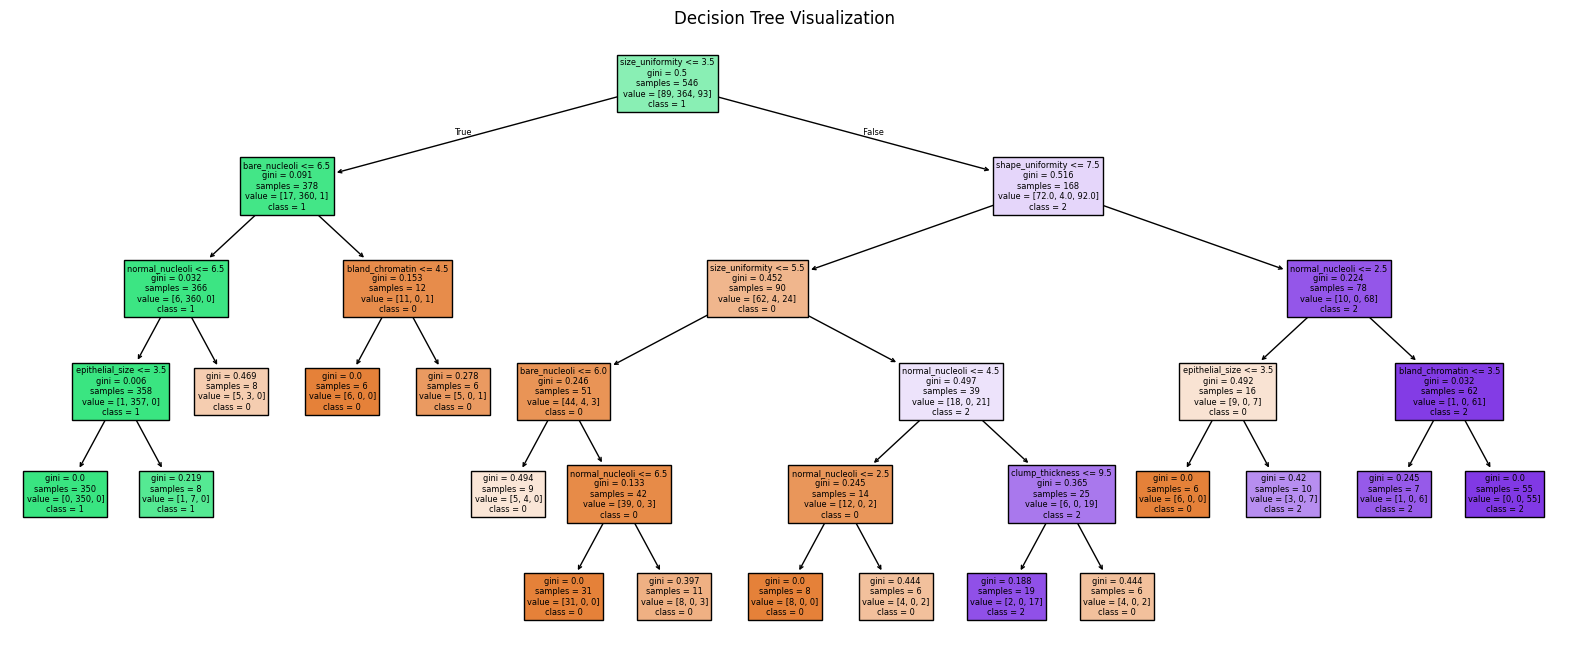

In [45]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5, max_depth=5, min_weight_fraction_leaf=0.01)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(20, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=breast_cancer.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [12]:
ds = DSClassifierMultiQ(3, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=breast_cancer.columns.tolist())


Optimization started

Training time: 27.96s, epochs: 200

Least training loss reached: 0.022


In [13]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.687] R23: bare_nucleoli > 5.915
			0: 0.687	1: 0.000	2: 0.000	Unc: 0.313

	[0.593] R26: 3.315 < bland_chromatin < 4.921
			0: 0.593	1: 0.000	2: 0.000	Unc: 0.407

	[0.573] R9: 1.167 < shape_uniformity < 3.212
			0: 0.415	1: 0.377	2: 0.000	Unc: 0.208

	[0.571] R27: bland_chromatin > 4.921
			0: 0.391	1: 0.000	2: 0.446	Unc: 0.164

	[0.566] R3: clump_thickness > 6.277
			0: 0.489	1: 0.000	2: 0.166	Unc: 0.345

	[0.564] R6: 3.106 < size_uniformity < 5.166
			0: 0.560	1: 0.008	2: 0.000	Unc: 0.432

	[0.553] R34: 1.553 < mitoses < 2.653
			0: 0.445	1: 0.243	2: 0.000	Unc: 0.313

	[0.544] R10: 3.212 < shape_uniformity < 5.258
			0: 0.520	1: 0.050	2: 0.000	Unc: 0.431

	[0.539] R18: 3.185 < epithelial_size < 4.654
			0: 0.490	1: 0.000	2: 0.104	Unc: 0.406

	[0.478] R14: 2.824 < marginal_adhesion < 4.750
			0: 0.332	1: 0.358	2: 0.000	Unc: 0.310

	[0.424] R15: marginal_adhesion > 4.750
			0: 0.229	1: 0.000	2: 0.553	Unc: 0.218

	[0.411] R5: 1.047 < size_uniformit

In [14]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.92


## DBSCAN

In [15]:
#dividir los datos en entrenamiento y prueba
n_clusters = len(np.unique(dbscan_labels))
max_label = np.max(dbscan_labels)
dbscan_labels = np.where(dbscan_labels == -1, max_label + 1, dbscan_labels)  # Assign a new label for noise points
X_train, X_test, y_train, y_test = train_test_split(breast_cancer, dbscan_labels, test_size=0.2, random_state=42)


In [16]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.99


In [17]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 1
DBSCAN Ripper Rules: 1

Reglas para clase: 0
[[clump_thickness=5^bland_chromatin=3^shape_uniformity=1^marginal_adhesion=1]]

Reglas para clase: 1
[[epithelial_size=1^bland_chromatin=3^clump_thickness=1]]

Reglas para clase: 2
[[clump_thickness=2^bland_chromatin=2^size_uniformity=1^epithelial_size=2]]

Reglas para clase: 3
[[clump_thickness=4^bland_chromatin=2^size_uniformity=1^marginal_adhesion=1^shape_uniformity=1]]

Reglas para clase: 4
[[clump_thickness=4^bland_chromatin=3^shape_uniformity=1^marginal_adhesion=1^normal_nucleoli=1]]

Reglas para clase: 5
[[clump_thickness=3^bland_chromatin=2^epithelial_size=2^size_uniformity=1^shape_uniformity=1]]

Reglas para clase: 6
[[clump_thickness=1^bland_chromatin=3^epithelial_size=2^shape_uniformity=1]]

Reglas para clase: 7
[[clump_thickness=5^bland_chromatin=2^shape_uniformity=1^marginal_adhesion=1^bare_nucleoli=1.0^normal_nucleoli=1]]

Reglas para clase: 8
[[epithelial_size=1^clump_thickness=3]]

Reglas para clase: 9


Decision Tree Accuracy: 0.96


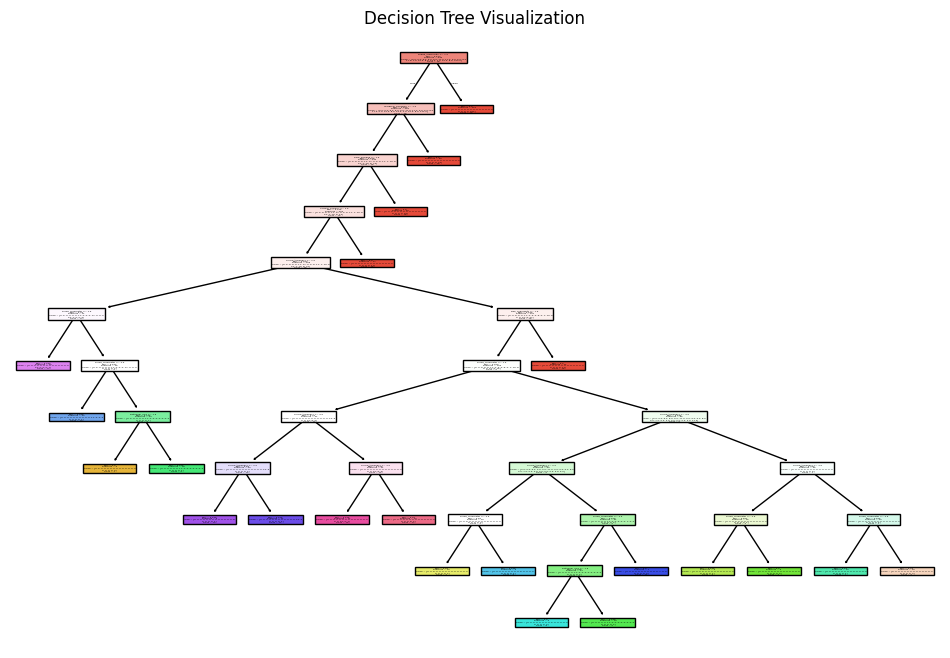

In [18]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=breast_cancer.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [19]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=breast_cancer.columns.tolist())


Optimization started

Training time: 17.03s, epochs: 111

Least training loss reached: 0.018


In [20]:
ds.print_most_important_rules(threshold=0.001)



Most important rules for class 0

	[0.293] R8: shape_uniformity < 1.167
			0: 0.088	1: 0.000	2: 0.053	3: 0.112	4: 0.013	5: 0.043	6: 0.067	7: 0.173	8: 0.001	9: 0.053	10: 0.067	11: 0.066	12: 0.018	13: 0.033	14: 0.022	15: 0.000	16: 0.018	17: 0.153	18: 0.002	Unc: 0.020

	[0.109] R4: size_uniformity < 1.047
			0: 0.016	1: 0.000	2: 0.000	3: 0.050	4: 0.000	5: 0.131	6: 0.039	7: 0.119	8: 0.056	9: 0.000	10: 0.039	11: 0.009	12: 0.060	13: 0.000	14: 0.042	15: 0.000	16: 0.060	17: 0.096	18: 0.044	Unc: 0.241

	[0.076] R25: 1.709 < bland_chromatin < 3.315
			0: 0.007	1: 0.035	2: 0.000	3: 0.026	4: 0.000	5: 0.108	6: 0.127	7: 0.103	8: 0.000	9: 0.000	10: 0.127	11: 0.002	12: 0.000	13: 0.000	14: 0.000	15: 0.000	16: 0.000	17: 0.000	18: 0.264	Unc: 0.202

	[0.062] R20: bare_nucleoli < 1.022
			0: 0.006	1: 0.000	2: 0.000	3: 0.018	4: 0.000	5: 0.092	6: 0.051	7: 0.067	8: 0.005	9: 0.000	10: 0.051	11: 0.002	12: 0.017	13: 0.000	14: 0.164	15: 0.000	16: 0.017	17: 0.049	18: 0.131	Unc: 0.330

	[0.059] R28: normal_nucleo

In [21]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.78


## GMM

In [29]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(breast_cancer, gmm_labels, test_size=0.2, random_state=42)

In [23]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.96


In [24]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 13
DBSCAN Ripper Rules: 4

Reglas para clase: 0
[[mitoses=1^bare_nucleoli=10.0] V [bare_nucleoli=2.0^mitoses=1] V [bare_nucleoli=5.0^mitoses=1] V [bare_nucleoli=3.0^mitoses=1] V [bare_nucleoli=8.0^mitoses=1] V [bare_nucleoli=4.0] V [size_uniformity=4^mitoses=1] V [normal_nucleoli=3^bare_nucleoli=1.0] V [marginal_adhesion=4^bare_nucleoli=1.0] V [epithelial_size=6^mitoses=1] V [epithelial_size=5^shape_uniformity=1] V [epithelial_size=10^bare_nucleoli=1.0] V [size_uniformity=2^bland_chromatin=7]]

Reglas para clase: 1
[[bare_nucleoli=1.0^epithelial_size=2^mitoses=1^normal_nucleoli=1] V [bare_nucleoli=1.0^epithelial_size=1] V [bare_nucleoli=1.0^normal_nucleoli=2^epithelial_size=2] V [bare_nucleoli=1.0^epithelial_size=3^normal_nucleoli=1]]

Reglas para clase: 2
[[bare_nucleoli=10.0^mitoses=2] V [mitoses=3] V [mitoses=2] V [bare_nucleoli=10.0^mitoses=4] V [mitoses=8] V [normal_nucleoli=10^mitoses=10] V [clump_thickness=9^bland_chromatin=2] V [mitoses=7] V [mitoses=10] V 

Decision Tree Accuracy: 0.98


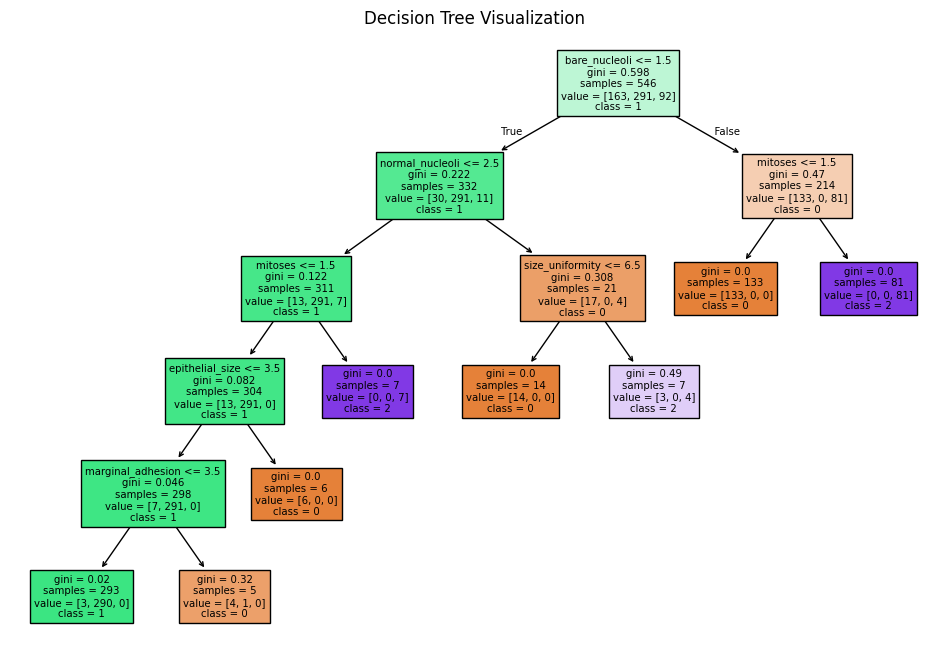

In [31]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=breast_cancer.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [26]:
ds = DSClassifierMultiQ(3, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=breast_cancer.columns.tolist())


Optimization started

Training time: 28.98s, epochs: 200

Least training loss reached: 0.012


In [27]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.756] R33: 0.453 < mitoses < 1.553
			0: 0.571	1: 0.429	2: 0.000	Unc: 0.000

	[0.716] R21: 1.022 < bare_nucleoli < 3.469
			0: 0.513	1: 0.000	2: 0.487	Unc: 0.000

	[0.701] R22: 3.469 < bare_nucleoli < 5.915
			0: 0.492	1: 0.000	2: 0.508	Unc: 0.000

	[0.688] R18: 3.185 < epithelial_size < 4.654
			0: 0.473	1: 0.000	2: 0.527	Unc: 0.000

	[0.665] R30: 2.753 < normal_nucleoli < 4.740
			0: 0.442	1: 0.000	2: 0.558	Unc: 0.000

	[0.632] R19: epithelial_size > 4.654
			0: 0.399	1: 0.000	2: 0.601	Unc: 0.000

	[0.574] R31: normal_nucleoli > 4.740
			0: 0.370	1: 0.000	2: 0.523	Unc: 0.107

	[0.564] R11: shape_uniformity > 5.258
			0: 0.331	1: 0.000	2: 0.631	Unc: 0.038

	[0.550] R15: marginal_adhesion > 4.750
			0: 0.384	1: 0.000	2: 0.402	Unc: 0.213

	[0.493] R23: bare_nucleoli > 5.915
			0: 0.282	1: 0.000	2: 0.579	Unc: 0.139

	[0.493] R26: 3.315 < bland_chromatin < 4.921
			0: 0.306	1: 0.003	2: 0.485	Unc: 0.207

	[0.446] R5: 1.047 < size_uniformity < 3.106
		

In [28]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.98
